## Step 1: Installing dependencies and setting up a GPU environment

## Step 2: Importing the libraries and the dataset

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import mnist

## Step 3: Data Preprocessing



### Loading the dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


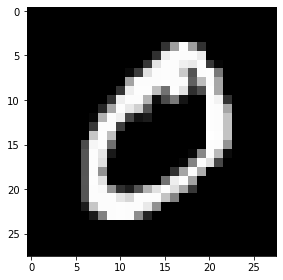

In [ ]:
from skimage import io
io.imshow(X_train[1,:,:])

### Normalizing the images

We divide each pixel of the image in the training and test sets by the maximum number of pixels (255).

In this way each pixel will be in the range [0, 1]. By normalizing images we make sure that our model (ANN) trains faster.

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_test = X_test / 255.0

### Reshaping the dataset

Since we are building a fully connected network, we reshape the training set and the test set to be into the vector format.

In [ ]:
# Since each image's dimension is 28x28, we reshape the full dataset to [-1 (all elements), height * width]
X_train = X_train.reshape(-1, 28*28)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# We reshape the test set the same way
X_test = X_test.reshape(-1, 28*28)

## Step 4: Building an Artificial Neural Network

### Defining the model

Simply define an object of the Sequential model.

In [ ]:
model = tf.keras.models.Sequential()

### Adding a first fully-connected hidden layer

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

### Adding a second layer with Dropout

Dropout is a Regularization technique where we randomly set neurons in a layer to zero. That way while training those neurons won't be updated. Because some percentage of neurons won't be updated the whole training process is long and we have less chance for overfitting.

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Adding the output layer

- units: number of classes (10 in the Fashion MNIST dataset)
- activation: softmax

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Compiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 2.2686 - sparse_categorical_accuracy: 0.7156
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6846 - sparse_categorical_accuracy: 0.8195
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5799 - sparse_categorical_accuracy: 0.8508
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4795 - sparse_categorical_accuracy: 0.8753
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3998 - sparse_categorical_accuracy: 0.8938


### Model evaluation and prediction

In [ ]:
test_loss, test_accuracy = model.evaluate(X_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2200 - sparse_categorical_accuracy: 0.9435


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.9434666633605957


In [ ]:
wer=model.predict(X_test)


In [ ]:
import numpy as np

In [ ]:
y_pre=np.array([])
for i in wer:
  y_pre=np.append(y_pre,np.argmax(i))
print(y_pre[:26])

[7. 2. 1. 0. 4. 1. 4. 9. 8. 9. 0. 6. 9. 0. 1. 5. 9. 7. 8. 4. 9. 6. 6. 5.
 4. 0.]


#ANN來分類IRIS資料集


In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.model_selection import train_test_split

X = iris.drop('species',axis=1)

y = iris['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
3,4.6,3.1,1.5,0.2
111,6.4,2.7,5.3,1.9
51,6.4,3.2,4.5,1.5
61,5.9,3.0,4.2,1.5
...,...,...,...,...
148,6.2,3.4,5.4,2.3
91,6.1,3.0,4.6,1.4
106,4.9,2.5,4.5,1.7
121,5.6,2.8,4.9,2.0


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
y_train_1=np.array([0 for i in range(len(y_train ))])
y_test_1=np.array([0 for i in range(len(y_test ))])

In [ ]:
y_train_1[y_train=='setosa']=np.uint8(0)
y_train_1[y_train=='versicolor']=np.uint8(1)
y_train_1[y_train=='virginica']=np.uint8(2)

In [ ]:
y_test_1[y_test=='setosa']=np.uint8(0)
y_test_1[y_test=='versicolor']=np.uint8(0)
y_test_1[y_test=='virginica']=np.uint8(0)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
import numpy as np
import datetime
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(4, )))

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               640       
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 3)                 195       
                                                                 
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X_train, y_train_1, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 9ms/step - loss: 0.3961 - sparse_categorical_accuracy: 0.8286
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3624 - sparse_categorical_accuracy: 0.8476
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3434 - sparse_categorical_accuracy: 0.8667
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3212 - sparse_categorical_accuracy: 0.8667
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3113 - sparse_categorical_accuracy: 0.8952
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2906 - sparse_categorical_accuracy: 0.8762
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2916 - sparse_categorical_accuracy: 0.8571
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9048
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2695 - s

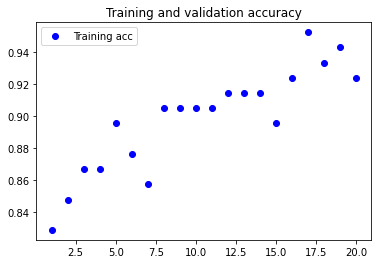

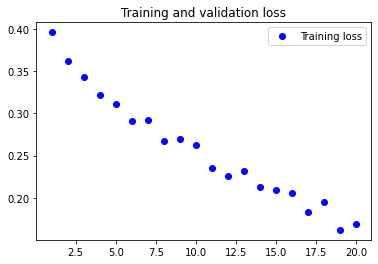

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['sparse_categorical_accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, len(acc) +1)
plt.plot(epochs, acc,'bo', label='Training acc')
#plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
#plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model evaluation and prediction

In [ ]:
wer=model.predict(X_test)
y_pre=np.array([])
for i in wer:
  y_pre=np.append(y_pre,np.argmax(i))
print(y_pre[:26])

[0. 0. 0. 2. 2. 1. 0. 2. 2. 0. 0. 0. 2. 2. 1. 2. 0. 0. 2. 2. 0. 2. 0. 1.
 0. 2.]


In [ ]:

print(y_pre[:26])

[0. 0. 0. 2. 2. 1. 0. 2. 2. 0. 0. 0. 2. 2. 1. 2. 0. 0. 2. 2. 0. 2. 0. 1.
 0. 2.]


In [ ]:
import numpy as np
c=np.array([1.22486999e-05, 3.02239897e-07, 2.17280402e-07, 1.25556454e-07, 2.97502061e-06, 5.98158240e-02, 1.07656952e-05, 2.32006647e-02 ,  2.42297010e-05, 9.16932642e-01])
#np.argmax(c)
v=np.array([1,2,3])
v=np.append(v,10)
print(v)

[ 1  2  3 10]


In [ ]:
print(wer[:50])
print(y_test_1[:50])

[[0.72659904 0.18427655 0.0891244 ]
 [0.6540632  0.23046327 0.11547355]
 [0.7408559  0.17631233 0.08283179]
 [0.10862968 0.280524   0.61084634]
 [0.03196582 0.15293376 0.8151004 ]
 [0.2382027  0.40232253 0.35947472]
 [0.63238287 0.24666436 0.12095279]
 [0.04672354 0.17716128 0.7761152 ]
 [0.10029582 0.2592963  0.64040786]
 [0.6859774  0.21297368 0.10104892]
 [0.6001392  0.2791955  0.12066532]
 [0.6632491  0.22583447 0.11091638]
 [0.08701428 0.2573124  0.65567327]
 [0.04570464 0.17653468 0.7777607 ]
 [0.28109822 0.37419605 0.34470576]
 [0.01220531 0.09925831 0.8885364 ]
 [0.69622004 0.20372088 0.10005904]
 [0.6316179  0.25329933 0.11508276]
 [0.01398403 0.1013214  0.8846945 ]
 [0.19425802 0.3010636  0.50467837]
 [0.68753606 0.20822732 0.10423658]
 [0.13321881 0.28318003 0.5836012 ]
 [0.693342   0.20434643 0.1023116 ]
 [0.23817714 0.41103992 0.3507829 ]
 [0.66629595 0.22388387 0.10982022]
 [0.10706337 0.3413036  0.55163306]
 [0.11840718 0.2791181  0.6024747 ]
 [0.65460294 0.21979626 0.12

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_1)

2/2 [==============================] - 0s 7ms/step - loss: 1.6066 - sparse_categorical_accuracy: 0.4000


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.4000000059604645


#用heart.csv訓練

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
hearts = pd.read_csv('/content/heart.csv', encoding= 'unicode_escape') #指定編碼格式

In [ ]:
hearts

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
x_train= hearts.drop(['output'], axis=1)
y_train= hearts["output"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train ,test_size=0.3, random_state=None)#42

In [ ]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [ ]:
x_train.shape

(212, 13)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=156, activation='relu', input_shape=(13, )))

In [ ]:
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 156)               2184      
                                                                 
 dropout_7 (Dropout)         (None, 156)               0         
                                                                 
 dense_18 (Dense)            (None, 2)                 314       
                                                                 
Total params: 2,498
Trainable params: 2,498
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
7/7 [==============================] - 0s 27ms/step - loss: 0.6814 - sparse_categorical_accuracy: 0.5896 - val_loss: 0.6219 - val_sparse_categorical_accuracy: 0.6593
Epoch 2/5
7/7 [==============================] - 0s 6ms/step - loss: 0.5502 - sparse_categorical_accuracy: 0.7547 - val_loss: 0.5376 - val_sparse_categorical_accuracy: 0.7363
Epoch 3/5
7/7 [==============================] - 0s 6ms/step - loss: 0.4664 - sparse_categorical_accuracy: 0.8349 - val_loss: 0.4874 - val_sparse_categorical_accuracy: 0.8242
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.4001 - sparse_categorical_accuracy: 0.8302 - val_loss: 0.4589 - val_sparse_categorical_accuracy: 0.8132
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.3761 - sparse_categorical_accuracy: 0.8396 - val_loss: 0.4448 - val_sparse_categorical_accuracy: 0.8022


In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4448 - sparse_categorical_accuracy: 0.8022


[0.4447741210460663, 0.8021978139877319]